# Exploratory Data Analysis

This notebook provides the exploratory data analysis of the MovieLens dataset.

Data sources: the movies_metadata.csv is from [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset). The detailed information can be found in the linked.

Brief introduction: the movies_metadata.csv contains metadata for all 45,000 movies listed in the Full MovieLens Dataset that are released on or before July 2017.

## Overview
- [Exploratory Data Analusis](#C5)
    - [Import Libraries](#C8)
    - [Loading Data](#C11)
    - [Data Cleaning](#C23)
    - [Summary Statistics](#C55)
    - [Top 10](#C60)
        - [Budget](#C61)
        - [Box Office Revenue](#C64)
        - [Box Office Hits](#C67)
        - [Box Office Flops](#C73)
        - [Ratings](#C77)
    - [Asking and Answering Questions](#C80)
        - [What are the movie genres that famous directors (Hollywood and Bollywood) have mostly worked in?](#C81)
        - [Who are the most number of actors that famous directors have worked with?](#C97)
        - [What are the top 10 languages in terms of revenue?](#C106)
        - [What are the top 10 rated movies in the top 10 languages with the highest revenue?](#C110)
        - [What are the top 5 Genres each year?](#C114)

- [Recommendation System](#C54)

- [Summary and Conclusion](#C121)

<hr style="height:10px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

## Exploratory Data Analysis <a id='C5'></a>

### Imports Libraries <a id='C8'></a>

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr
import pycountry             
# import operator
# from collections import Counter
import warnings     

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Loading Data <a id='C11'></a>

In [2]:
warnings.filterwarnings('ignore')
metadata = pd.read_csv('/Users/longhaojin/Desktop/Movie EDA/movies_metadata.csv')
pd.set_option('display.float_format', '{:,}'.format)

Let's look at the first five columns of the dataset.

In [3]:
metadata.set_index('id', inplace = True)
metadata.head(5)

adult                              belongs_to_collection    budget  \
id                                                                          
862    False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
8844   False                                                NaN  65000000   
15602  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
31357  False                                                NaN  16000000   
11862  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                                  genres  \
id                                                         
862    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
8844   [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
15602  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
31357  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
11862                     [{'id': 35, 'name': 'Comedy'}]   

                                   homepage    imdb_id original_language  \
id                                                                         
862    http://toystory.disney.com/toy-story  tt0114709                en   
8844                                    NaN  tt0113497                en   
15602                                   NaN  tt0113228                en   
31357                                   NaN  tt0114885                en   
11862                                   NaN  tt0113041                en   

                    original_title  \
id                                   
862                      Toy Story   
8844                       Jumanji   
15602             Grumpier Old Men   
31357            Waiting to Exhale   
11862  Father of the Bride Part II   

                                                overview        popularity  \
id                                                                           
862    Led by Woody, Andy's toys live happily in his ...         21.946943   
8844   When siblings Judy and Peter discover an encha...         17.015539   
15602  A family wedding reignites the ancient feud be...           11.7129   
31357  Cheated on, mistreated and stepped on, the wom...          3.859495   
11862  Just when George Banks has recovered from his ... 8.387519000000001   

       ... release_date       revenue runtime  \
id     ...                                      
862    ...   1995-10-30 373,554,033.0    81.0   
8844   ...   1995-12-15 262,797,249.0   104.0   
15602  ...   1995-12-22           0.0   101.0   
31357  ...   1995-12-22  81,452,156.0   127.0   
11862  ...   1995-02-10  76,578,911.0   106.0   

                                        spoken_languages    status  \
id                                                                   
862             [{'iso_639_1': 'en', 'name': 'English'}]  Released   
8844   [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
15602           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
31357           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
11862           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                                 tagline  \
id                                                         
862                                                  NaN   
8844           Roll the dice and unleash the excitement!   
15602  Still Yelling. Still Fighting. Still Ready for...   
31357  Friends are the people who let you be yourself...   
11862  Just When His World Is Back To Normal... He's ...   

                             title  video vote_average vote_count  
id                                                                 
862                      Toy Story  False          7.7    5,415.0  
8844                       Jumanji  False          6.9    2,413.0  
15602             Grumpier Old Men  False          6.5       92.0  
31357            Waiting to Exhale  False          6.1       34.0  
11862  Father of the Bride Part II 

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Data Cleaning <a id='C23'></a>

Firstly, some of the columns will be deleted since we are not going to use the information. For example: *adult*, *belongs_to_collection*, *homepage*, *overview*, *release_date*, *status*, *tagline*, *runtime*, etc.

In [4]:
metadata.drop(labels=['adult','belongs_to_collection','homepage','original_language','original_title','overview','popularity','production_companies','production_countries','release_date','status','tagline','runtime','poster_path','video'], axis='columns', inplace=True)

Secondly, we will use regular expression to extract information from the columns: *genres*, *production_companies*, *production_countries* and *spoken_languages*. Before doing that, we need to drop the missing values for those columns.

In [5]:
metadata.dropna(subset=['genres'], axis='rows', inplace=True)
# metadata.dropna(subset=['production_companies'], axis='rows', inplace=True)
# metadata.dropna(subset=['production_countries'], axis='rows', inplace=True)
metadata.dropna(subset=['spoken_languages'], axis='rows', inplace=True)

regex = re.compile(r": '(.*?)'")
metadata['genres'] = metadata['genres'].apply(lambda x: ', '.join(regex.findall(x)))
# metadata['production_companies'] = metadata['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))
# metadata['production_countries'] = metadata['production_countries'].apply(lambda x: ', '.join(regex.findall(x)))
metadata['spoken_languages'] = metadata['spoken_languages'].apply(lambda x: ', '.join(regex.findall(x)))

Thirdly, we change the type of *budget* and *popularity* from object to float for further analysis.

In [6]:
metadata['budget'] = metadata['budget'].astype(float)
# metadata['popularity'] = metadata['popularity'].astype(float)
# metadata.info()

Next, we drop the missing values and remove the duplicates from column *imdb_id*. After that, remove column *imdb_id* since we do not need the information. 

In [7]:
metadata.dropna(subset=['imdb_id'], inplace=True)
dupl = metadata['imdb_id'].duplicated(keep=False)
metadata.loc[dupl, ['imdb_id']].sort_values('imdb_id').head(10)
metadata.drop_duplicates('imdb_id', inplace=True)
metadata.drop(labels=['imdb_id'], axis='columns', inplace=True)

Lastly, rearranging the columns to make a well-organized datasets.

In [8]:
metadata = metadata.reindex(columns=['title','genres','spoken_languages','budget', 'revenue','vote_average','vote_count',])

In [9]:
metadata.head(5)

title                      genres  \
id                                                               
862                      Toy Story   Animation, Comedy, Family   
8844                       Jumanji  Adventure, Fantasy, Family   
15602             Grumpier Old Men             Romance, Comedy   
31357            Waiting to Exhale      Comedy, Drama, Romance   
11862  Father of the Bride Part II                      Comedy   

                spoken_languages       budget       revenue  vote_average  \
id                                                                          
862                  en, English 30,000,000.0 373,554,033.0           7.7   
8844   en, English, fr, Français 65,000,000.0 262,797,249.0           6.9   
15602                en, English          0.0           0.0           6.5   
31357                en, English 16,000,000.0  81,452,156.0           6.1   
11862                en, English          0.0  76,578,911.0           5.7   

       vote_count  
id                 
862       5,415.0  
8844      2,413.0  
15602        92.0  
31357        34.0  
11862       173.0

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Summary Statistics <a id='C55'></a>

In [10]:
metadata.describe().T

count                 mean                 std  min  25%  50%  \
budget       45,413.0  4,226,332.363838549   17,431,615.429206  0.0  0.0  0.0   
revenue      45,413.0 11,217,081.584370114 64,363,807.81208938  0.0  0.0  0.0   
vote_average 45,413.0    5.618882258383868  1.9232271018582061  0.0  5.0  6.0   
vote_count   45,413.0   109.97419241186445   491.5542780282294  0.0  3.0 10.0   

              75%             max  
budget        0.0   380,000,000.0  
revenue       0.0 2,787,965,087.0  
vote_average  6.8            10.0  
vote_count   34.0        14,075.0

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

### Top 5 <a id='C60'></a>

Listed below are the top 5 movies based on *budget*, *revenue*, *profit*, *loss* and *rating*.

#### Budget <a id='C61'></a>

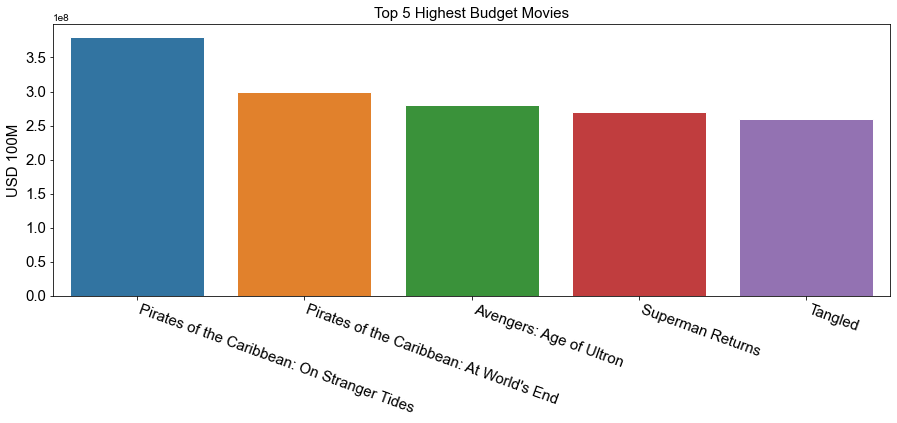

In [11]:
cols = ['title', 'budget']
budget = metadata.sort_values('budget', ascending=False)[cols].set_index('title')
budget_t5 = budget.head(5)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=budget_t5, x=budget_t5.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD 100M', fontsize=15);
plt.title('Top 5 Highest Budget Movies', fontsize=15);

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Revenue <a id='C64'></a>

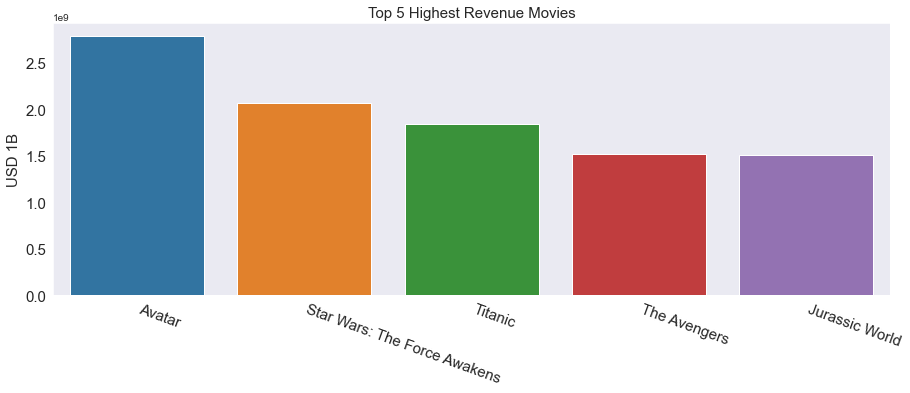

In [12]:
cols = ['title', 'revenue']
revenue = metadata.sort_values('revenue', ascending=False)[cols].set_index('title')
revenue_t5 = revenue.head(5)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=revenue_t5, x=revenue_t5.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD 1B', fontsize=15);
plt.title('Top 5 Highest Revenue Movies', fontsize=15);

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Profit <a id='C67'></a>

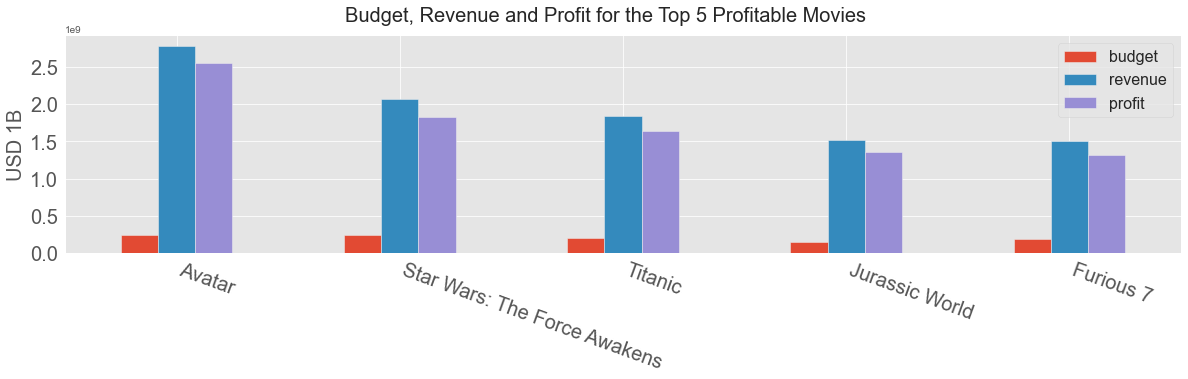

In [13]:
profit = metadata['revenue']-metadata['budget']
profit.name = 'profit'
profits = metadata.join(profit)[['title', 'budget', 'revenue', 'profit']].sort_values('profit', ascending=False)
profits_t5 = profits.head(5).set_index('title')

plt.style.use('ggplot')
profits_t5.plot(kind='bar', figsize=(20,4), fontsize=20)
plt.ylabel('USD 1B', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Budget, Revenue and Profit for the Top 5 Profitable Movies', fontsize=20)
plt.axes().legend(fontsize=16);

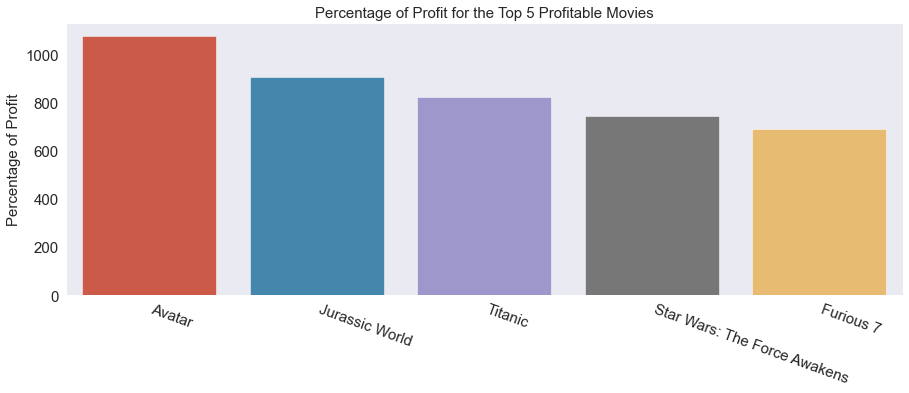

In [15]:
profits_p = (profits_t5['profit']/profits_t5['budget']*100)
profits_p = profits_p.sort_values(ascending=False).to_frame().rename(columns={0:'Percentage of Profit'})

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=profits_p, x=profits_p.index, y='Percentage of Profit')
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('Percentage of Profit', fontsize=15);
plt.title('Percentage of Profit for the Top 5 Profitable Movies', fontsize=15);

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Loss <a id='C73'></a>

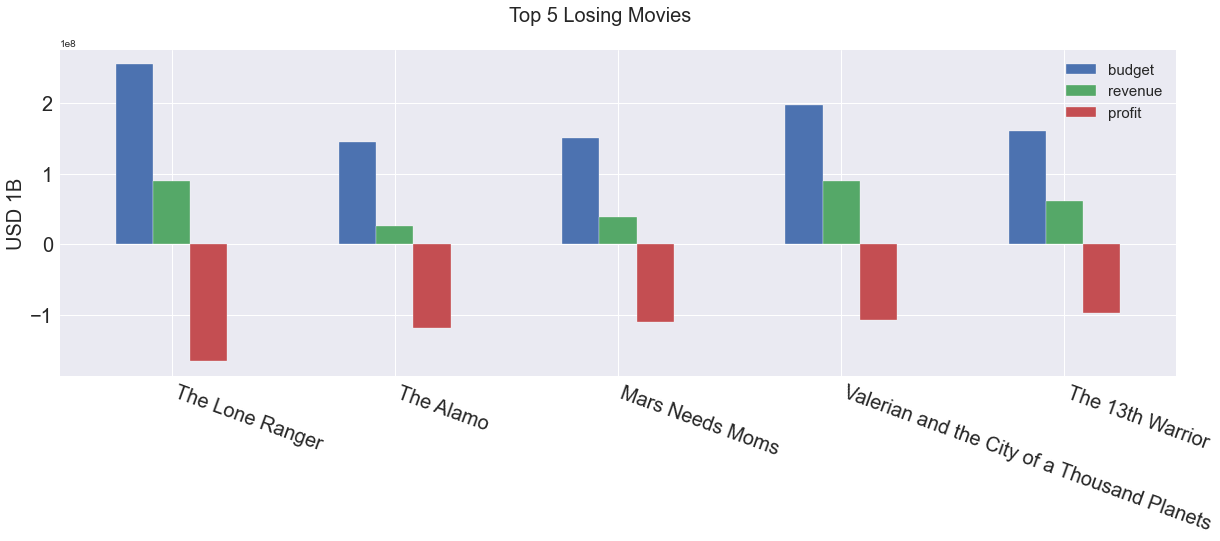

In [16]:
loss_t5 = profits[profits['revenue'] > 0].tail(5).sort_values(['profit', 'revenue']).set_index('title')

plt.style.use('seaborn')
loss_t5.plot(kind='bar', figsize=(20,6), fontsize=20)
plt.ylabel('USD 1B', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Top 5 Losing Movies', fontsize=20)
plt.axes().legend(fontsize=15);

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### Rating <a id='C77'></a>

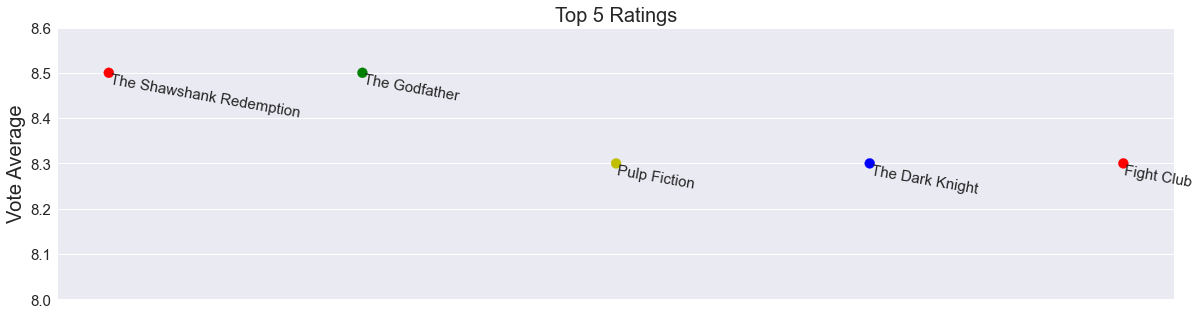

In [20]:
condition = (metadata.vote_count)>5000
rating = metadata.loc[condition, ['title', 'vote_average']].sort_values('vote_average', ascending=False)
rating_t5 = rating.head(5)

plt.style.use('seaborn')
_ = rating_t5.plot(kind='scatter', x='title', y='vote_average', grid=True,
                        figsize=(20,5), fontsize=15, xticks='', ylim=(8,8.6), s=100, 
                        c=['r', 'g', 'y', 'b', 'r',]);
for i, (title, vote) in enumerate(zip(rating_t5.title, rating_t5.vote_average)):
    _ = plt.text(i, vote, title, rotation=-10, va='top', ha='left', 
                 fontsize=15);
plt.ylabel('Vote Average', fontsize=20);
plt.title('Top 5 Ratings', fontsize=20)
plt.xlabel('');

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### What are the top 10 languages in terms of revenue ? <a id='C106'></a>
We can answer this question by grouping the movies dataframe by *original_language*, aggregating and sorting the *revenue* column in descending order. The get_language function uses the external pycountry module and returns the full name of the language from the language shortcode. This step is not necessary and I have used it only for data representation below. The cn language shortcode returns np.nan so we can manually fill this with the correct language name - 'Chinese'.

##### Answer: Top 10 Languages in Terms of Revenue

In [40]:
def get_language(short_code):                                   #a function to extract language from language short-code.
    language = pycountry.languages.get(alpha_2=str(short_code))
    if language:
        return language.name
    else:
        return np.nan
top10_lang_rev = movies.groupby('original_language').sum()['revenue'].sort_values(ascending=False)[:10].to_frame()
top10_lang_rev['language'] = top10_lang_rev.index.map(get_language).fillna('Chinese') 
top10_lang_rev

revenue  language
original_language                            
en                489,474,683,981.0   English
ja                  3,593,021,014.0  Japanese
zh                  3,344,862,587.0   Chinese
fr                  2,687,874,361.0    French
hi                  2,671,224,642.0     Hindi
es                  1,079,643,285.0   Spanish
ko                    968,643,475.0    Korean
cn                    962,525,769.0   Chinese
ru                    813,809,870.0   Russian
de                    762,197,134.0    German

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### What are the top 10 rated movies in the top 10 languages with the highest revenue? <a id='C110'></a>

We can answer this question by first filtering for languages we got from answering the previous question and also for movies with vote count greater than 100 and saving it to a dataframe. The last filter solves the problem of retrieving movies with a unreleastic rating of 10 and also account for foreign languages with considerably less number of vote count.

We can then groupby original language and rank the vote averages with *method='first'* to break ties. Finally create a column. Finally create column with language names as we did before and pivot the dataframe to retrieve the titles.

##### Answer: Top 10 Rated Movies in Top 10 Languages with the Highest Revenue

In [41]:
cond = (movies.original_language.isin(top10_lang_rev.index)) & (movies.vote_count>100)
title_vote_avg = movies.loc[cond,['title', 'vote_average', 'original_language']]

grouped = title_vote_avg.groupby('original_language')
title_vote_avg['vote_rank'] = grouped['vote_average'].rank(method='first').astype(int)
title_vote_avg['language'] = title_vote_avg['original_language'].apply(get_language).fillna('Chinese')

lang_top10 = title_vote_avg[title_vote_avg['vote_rank']<11]
lang_top10.pivot(['language', 'original_language'], 'vote_rank', 'title')

vote_rank                                                  1   \
language original_language                                      
Chinese  cn                                The Accidental Spy   
         zh                                      Dragon Blade   
English  en                                 House of the Dead   
French   fr                        The Visitors: Bastille Day   
German   de                                          Wetlands   
Hindi    hi                 Lagaan: Once Upon a Time in India   
Japanese ja                         Battle Royale II: Requiem   
Korean   ko                                Dragon Wars: D-War   
Russian  ru                                         Guardians   
Spanish  es                                    [REC]³ Genesis   

vote_rank                                                 2   \
language original_language                                     
Chinese  cn                                   Chinese Zodiac   
         zh                                  The Grandmaster   
English  en                             Dragonball Evolution   
French   fr                                           Desire   
German   de                                            Cargo   
Hindi    hi                                    Kal Ho Naa Ho   
Japanese ja                 Saint Seiya: Legend of Sanctuary   
Korean   ko                                         The Host   
Russian  ru                                        Day Watch   
Spanish  es                                [REC]⁴ Apocalypse   

vote_rank                                        3   \
language original_language                            
Chinese  cn                                     CJ7   
         zh                              Wolf Totem   
English  en                       Battlefield Earth   
French   fr                 French Fried Vacation 3   
German   de                     Rabbit Without Ears   
Hindi    hi                            The Lunchbox   
Japanese ja                         Attack on Titan   
Korean   ko                             Snowpiercer   
Russian  ru                             Night Watch   
Spanish  es                              Aftershock   

vote_rank                                                                  4   \
language original_language                                                      
Chinese  cn                                                      Mr. Nice Guy   
         zh                 Detective Dee and the Mystery of the Phantom F...   
English  en                                                 Alone in the Dark   
French   fr                                                           Brice 3   
German   de                                                          Kokowaah   
Hindi    hi                                          Kabhi Khushi Kabhie Gham   
Japanese ja                                     Pokémon: Spell of the Unknown   
Korean   ko                                             A Tale of Two Sisters   
Russian  ru                                  Mongol: The Rise of Genghis Khan   
Spanish  es                                                  Spanish Affair 2   

vote_rank                                            5   \
language original_language                                
Chinese  cn                               Game of Death   
         zh                  Curse of the Golden Flower   
English  en                              Disaster Movie   
French   fr                                  Lucky Luke   
German   de                                     Phoenix   
Hindi    hi                            Taare Zameen Par   
Japanese ja                 Resident Evil: Degeneration   
Korean   ko                                      Thirst   
Russian  ru                                 Russian Ark   
Spanish  es                                Room in Rome   

vote_rank                                                       6   \
language original_language           

<hr style="height:2px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

#### What are the top 5 Genres each year ? <a id='C114'></a>

To answer this question we will create dummy variables for genres as we did earlier, resample the data on a yearly frequency and create a DataFrame of totals to visualize the data with a [bar chart race](https://www.dexplo.org/bar_chart_race/).

In [42]:
cond = (movies.status == 'Released') & (movies.genres != '') & (movies.release_date.notna()) #filter for releaesed, non-empty genres missing release dates
released_movies = movies[cond] 
release_year = pd.to_datetime(released_movies.release_date) #retrieving year from released_movies

In [43]:
genre_dummies = released_movies.genres.str.get_dummies(sep=', ').set_index(release_year).sort_index() #creating genre dummy variables
genre_yearly = genre_dummies.resample('Y').sum() #create yearly totals
genre_yearly = genre_yearly.loc[(genre_yearly != 0).any(axis=1)] #remove rows which are all zeros, cause by yearly resampling.

##### Answer: Top 5 Genres by year
*The code below will take some time to run.*

In [44]:
bcr.bar_chart_race(genre_yearly, period_fmt='%Y', fixed_order=False, n_bars=5,
                   interpolate_period=False, period_length=2000,
                  steps_per_period=20) 

Below is the summary of the trend in genres over the years:
- 1874-1900: Not many movies in our data. Documentary taking the first place for sometime followed by Fantasy, Comedy and Horror.
- 1900-1920: We can mostly observe Drama, Comedy and Romance but Fantasy and Animation appear as well.
- 1920-1930: We see Music making a brief apperance along with Drama, Comedy, Romance and Crime.
- 1930-1970: Many Genres swap places during this period, however Drama remains on top.
- 1970-2000: Horror finally shows itself during the 70's and late 80's. Action briefly takes 3rd place during late 90's.
- 2000-2017: We again see Documentary coming in to the top 5 here. 

<hr style="height:10px; border-radius:10px; background: linear-gradient(to right, #0F2027, #203A43, #2C5364);"> </hr>

## Summary and Conclusion <a id='C121'></a>

We just scratched the surface with our analysis in this notebook. More insights can be gained by exploring the remaing columns and other files from the dataset. 

Shortcomings: The dataset was highly skewed towards large values due to large number of small or zero values. The lack of information for other language movies was evident when we we tried to answer the second question. There were many missing values in the object data type columns - genre, title, etc. These were filtered on the go during the analysis. Assuming these shortcomings were not present we can be confident with our results above and gain more insights by comparing other categorical features that were not explored.

The sections covered in the notebook should serve as a rough guide on the steps for performing data analysis and visualization. I hope the reader discovers something new as i did. Some of the useful links and references are listed below.

- [Bar Chart Race Tutorial](https://www.dexplo.org/bar_chart_race/tutorial/)
- [Bar Chart Race - Medium Post](https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096)
- [Jupyter Notebook - Tips, Tricks and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- [Python - Collections](https://www.youtube.com/watch?v=cgDRugJzBfM)
- [Creating a table of contents in a IPython Notebook](https://sebastianraschka.com/Articles/2014_ipython_internal_links.html#bottom)

In [45]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


[jovian] Error: Failed to detect notebook filename. Please provide the correct notebook filename as the "filename" argument to "jovian.commit".
